In [15]:
import numpy as np
import scipy.signal
def conv2d(X, W, p=(0, 0), s=(1, 1)):

    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0], p[1]:p[1]+X_orig.shape[1]] = X_orig
    print(X_padded)
    res = []
    for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        print(int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0])
        res.append([])
        print("res", res)

        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return res

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
print('Conv2d Implementation:\n', conv2d(X, W, p=(1, 1), s=(1, 1)))



[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 2. 4. 0.]
 [0. 5. 6. 1. 3. 0.]
 [0. 1. 2. 0. 2. 0.]
 [0. 3. 4. 3. 2. 0.]
 [0. 0. 0. 0. 0. 0.]]
4 1
res [[]]
4 1
res [[11.0, 25.0, 32.0, 13.0], []]
4 1
res [[11.0, 25.0, 32.0, 13.0], [19.0, 25.0, 24.0, 13.0], []]
4 1
res [[11.0, 25.0, 32.0, 13.0], [19.0, 25.0, 24.0, 13.0], [13.0, 28.0, 25.0, 17.0], []]
Conv2d Implementation:
 [[11.0, 25.0, 32.0, 13.0], [19.0, 25.0, 24.0, 13.0], [13.0, 28.0, 25.0, 17.0], [11.0, 17.0, 14.0, 9.0]]


In [22]:
import torch
from torchvision.io import read_image
img = read_image('/Users/ceyhun/Downloads/D40B595D-E0EA-4838-8BBE-C7760E21C8DE 2.PNG')
print('Image shape:', img.shape)
print('Number of channels:', img.shape[0])
print('Image data type:', img.dtype)
print(img[:, 100:102, 100:102])

Image shape: torch.Size([4, 2560, 2560])
Number of channels: 4
Image data type: torch.uint8
tensor([[[255, 255],
         [255, 255]],

        [[213, 213],
         [213, 213]],

        [[173, 173],
         [173, 173]],

        [[255, 255],
         [255, 255]]], dtype=torch.uint8)


In [23]:
import torch
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

In [24]:
mnist_dataset = torchvision.datasets.MNIST(
    root = image_path, train = True, transform = transform, download = True
)

In [25]:
from torch.utils.data import Subset

mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))
mnist_valid_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [26]:
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [27]:
mnist_test_dataset = torchvision.datasets.MNIST(
    root = image_path, train = False, transform = transform, download = False
)

In [28]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

## Constructing a CNN in PyTorch

In [29]:
from torch import nn
model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2))


In [30]:
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2, stride=2))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2))

model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2, stride=2))

In [31]:
x= torch.ones((4,1,28,28), requires_grad=True)
model(x).shape

torch.Size([4, 64, 7, 7])

## Fully connected layer

In [32]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4,1,28,28))
model(x).shape

torch.Size([4, 3136])

In [33]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

## Loss Function and Optimizer

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

##  train the model

In [35]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    print(train_dl)
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()

        with torch.no_grad() :
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)

                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)


        print(f'Epoch {epoch+1} accuracy: ', f'{accuracy_hist_train[epoch]:.4f} val_accuracy: ',  f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid,accuracy_hist_train, accuracy_hist_valid



In [36]:
train_dl

In [37]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy:  0.9491 val_accuracy:  0.9817
Epoch 2 accuracy:  0.9840 val_accuracy:  0.9870
Epoch 3 accuracy:  0.9890 val_accuracy:  0.9886
Epoch 4 accuracy:  0.9913 val_accuracy:  0.9875
Epoch 5 accuracy:  0.9927 val_accuracy:  0.9879
Epoch 6 accuracy:  0.9944 val_accuracy:  0.9897
Epoch 7 accuracy:  0.9952 val_accuracy:  0.9864
Epoch 8 accuracy:  0.9961 val_accuracy:  0.9899
Epoch 9 accuracy:  0.9967 val_accuracy:  0.9885
Epoch 10 accuracy:  0.9965 val_accuracy:  0.9901
Epoch 11 accuracy:  0.9971 val_accuracy:  0.9904
Epoch 12 accuracy:  0.9975 val_accuracy:  0.9901
Epoch 13 accuracy:  0.9975 val_accuracy:  0.9891
Epoch 14 accuracy:  0.9973 val_accuracy:  0.9906
Epoch 15 accuracy:  0.9982 val_accuracy:  0.9909
Epoch 16 accuracy:  0.9976 val_accuracy:  0.9903
Epoch 17 accuracy:  0.9986 val_accuracy:  0.9910
Epoch 18 accuracy:  0.9982 val_accuracy:  0.9879
Epoch 19 accuracy:  0.9980 val_accuracy:  0.9902
Epoch 20 accuracy:  0.9987 val_accuracy:  0.9911


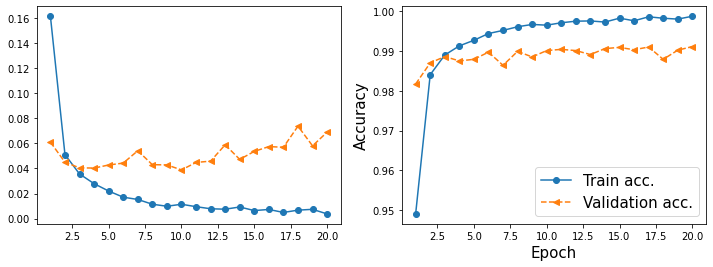

In [38]:
import matplotlib.pyplot as plt
import numpy as np
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<',label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [39]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')


Test accuracy: 0.9933


torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bb783220>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbb59e00>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbbaaf90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbbe5f90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbc22f90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbc5ef90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbc9bf90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbca5f40>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbce8040>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbd59f90>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbd62f40>
torch.Size([28, 28])
<built-in method size of Tensor object at 0x7fc2bbdab040>


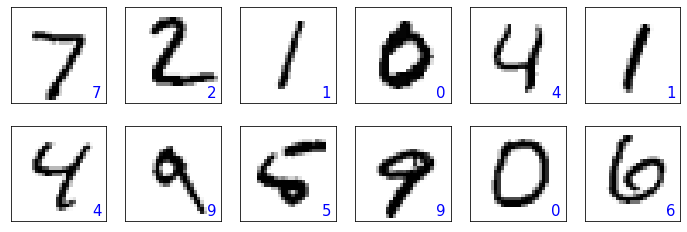

In [46]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    print(mnist_test_dataset[i][0][0, :, :].size())
    img = mnist_test_dataset[i][0][0, :, :]
    print(img.size)
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9,0.1, y_pred.item(),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
plt.show()

## CelebA Dataset

In [ ]:
image_path = './'
celeba_train_dataset = torchvision.datasets.CelebA(root = image_path, split = 'train', target_type='attr', download = True)
celeba_valid_dataset#%%
import numpy as np
import scipy.signal
def conv2d(X, W, p=(0, 0), s=(1, 1)):

    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0], p[1]:p[1]+X_orig.shape[1]] = X_orig
    print(X_padded)
    res = []
    for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        print(int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0])
        res.append([])
        print("res", res)

        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return res

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
print('Conv2d Implementation:\n', conv2d(X, W, p=(1, 1), s=(1, 1)))



In [ ]:
import torch
from torchvision.io import read_image
img = read_image('/Users/ceyhun/Downloads/D40B595D-E0EA-4838-8BBE-C7760E21C8DE 2.PNG')
print('Image shape:', img.shape)
print('Number of channels:', img.shape[0])
print('Image data type:', img.dtype)
print(img[:, 100:102, 100:102])

In [ ]:
import torch
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
mnist_dataset = torchvision.datasets.MNIST(
    root = image_path, train = True, transform = transform, download = True
)

In [ ]:
from torch.utils.data import Subset

mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))
mnist_valid_dataset[0]

In [ ]:
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_train_dataset[0]

In [ ]:
mnist_test_dataset = torchvision.datasets.MNIST(
    root = image_path, train = False, transform = transform, download = False
)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

## Constructing a CNN in PyTorch

In [ ]:
from torch import nn
model = nn.Sequential()

model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2))


In [ ]:
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2, stride=2))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2))

model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2, stride=2))

In [ ]:
x= torch.ones((4,1,28,28), requires_grad=True)
model(x).shape

## Fully connected layer

In [ ]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4,1,28,28))
model(x).shape

In [ ]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

## Loss Function and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

##  train the model

In [ ]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    print(train_dl)
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()

        with torch.no_grad() :
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)

                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)


        print(f'Epoch {epoch+1} accuracy: ', f'{accuracy_hist_train[epoch]:.4f} val_accuracy: ',  f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid,accuracy_hist_train, accuracy_hist_valid



In [ ]:
train_dl

In [ ]:
torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<',label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')


In [ ]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    print(mnist_test_dataset[i][0][0, :, :].size())
    img = mnist_test_dataset[i][0][0, :, :]
    print(img.size)
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9,0.1, y_pred.item(),
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
plt.show()

## CelebA Dataset

In [65]:
image_path = '/Users/ceyhun/Downloads/'
celeba_train_dataset = torchvision.datasets.CelebA(root = image_path, split = 'train', target_type='attr', download = True)
celeba_valid_dataset = torchvision.datasets.CelebA(root = image_path, split = 'valid', target_type='attr', download = True)
celeba_test_dataset = torchvision.datasets.CelebA(root = image_path, split = 'test', target_type='attr', download = True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [66]:
print('Train set:', len(celeba_train_dataset))
print('Valid set:', len(celeba_valid_dataset))
print('Test  set:', len(celeba_test_dataset))

Train set: 162770
Valid set: 19867
Test  set: 19962


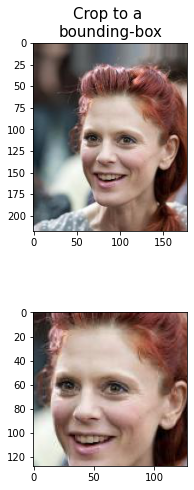

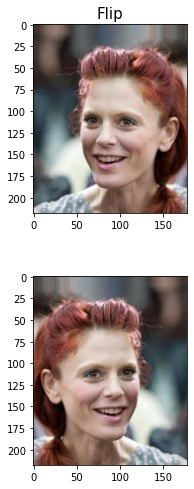

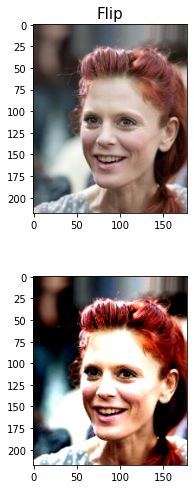

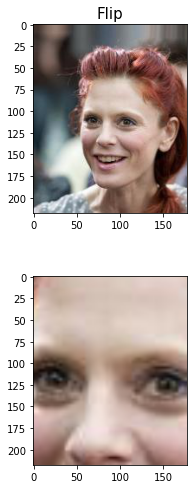

In [88]:
fig = plt.figure(figsize=(16, 8.5))
ax = fig.add_subplot(2, 5, 1)
img, attr = celeba_train_dataset[1]

ax.set_title('Crop to a \nbounding-box', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 6)
img_cropped = transforms.functional.crop(img, 50, 40, 128, 128)
ax.imshow(img_cropped)

fig = plt.figure(figsize=(16, 8.5))
ax = fig.add_subplot(2, 5, 2)
img, attr = celeba_train_dataset[1]

ax.set_title('Flip', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 7)
img_cropped = transforms.functional.hflip(img)
ax.imshow(img_cropped)


fig = plt.figure(figsize=(16, 8.5))
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[1]

ax.set_title('Flip', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_cropped = transforms.functional.adjust_contrast(img, contrast_factor=2)
ax.imshow(img_cropped)

fig = plt.figure(figsize=(16, 8.5))
ax = fig.add_subplot(2, 5, 3)
img, attr = celeba_train_dataset[1]

ax.set_title('Flip', size=15)
ax.imshow(img)
ax = fig.add_subplot(2, 5, 8)
img_center_crop = transforms.functional.center_crop(img, [0.3*218, 0.3*178])
img_resized = transforms.functional.resize(img_center_crop, size=(218, 178))
ax.imshow(img_resized)

In [89]:
get_smile = lambda attr: attr[18]

In [92]:
transform_train = transforms.Compose([transforms.RandomCrop([178, 178]), transforms.RandomHorizontalFlip(), transforms.Resize([64, 64]),
                                       transforms.ToTensor() ])

In [93]:
# Validation and Test set
transform = transforms.Compose([transforms.CenterCrop([178, 178]),transforms.Resize([64, 64]), transforms.ToTensor()])

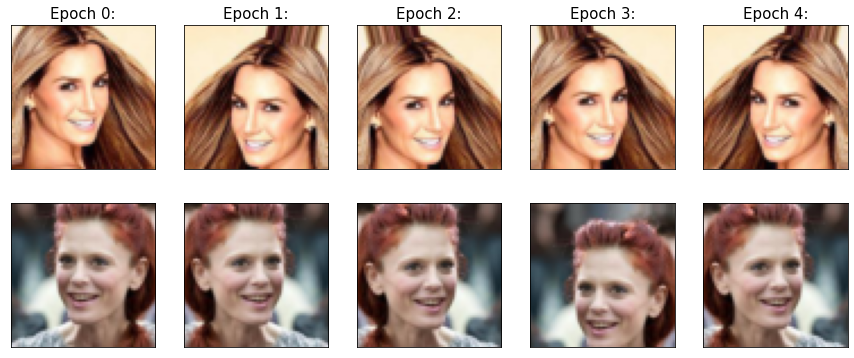

In [95]:
celeba_train_dataset = torchvision.datasets.CelebA(
    image_path, split='train',
    target_type='attr', download=False,
    transform=transform_train, target_transform=get_smile)
torch.manual_seed(1)
data_loader = DataLoader(celeba_train_dataset, batch_size=2)
fig = plt.figure(figsize=(15, 6))
num_epochs = 5
for j in range(num_epochs):
    img_batch, label_batch = next(iter(data_loader))
    img = img_batch[0]
    ax = fig.add_subplot(2, 5, j + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Epoch {j}:', size=15)
    ax.imshow(img.permute(1, 2, 0))
    img = img_batch[1]
    ax = fig.add_subplot(2, 5, j + 6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0))
plt.show()